<a href="https://colab.research.google.com/github/osmarbraz/exemplos_python/blob/master/ExemplosPythonEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos Estatísticas Python no Google Colaboratory

Estatística é a parte da ciência responsável pela coleta, organização e interpretação de dados experimentais e pela extrapolação dos resultados da amostra para a população. 

Exemplos em python:
- Mínimos quadrados;
- Estatísticas de conjuntos;
- Softmax;
- Métricas;
- Binary Cross-Entropy.

-----------------------------------------
**Guia Colab Iniciante:**

https://medium.com/machina-sapiens/google-colab-guia-do-iniciante-334d70aad531

**Documentação oficial:**

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb

**Características :**

https://colab.research.google.com/notebooks/basic_features_overview.ipynb



Precisão e acurácia

https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

## Mínimos quadrados
 
https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-conceitos-e-implementa%C3%A7%C3%A3o-com-python-232c19e00f03

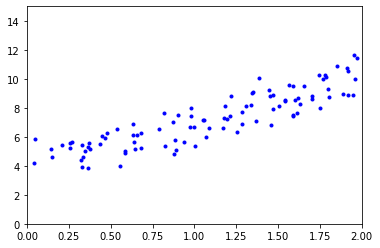

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_param = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

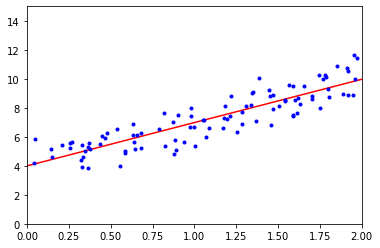

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_param)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_ #coeficiente linear
linear_reg.coef_ #coeficiente angular
linear_reg.predict(X_new)

array([[3.99349044],
       [9.97123942]])

## Estatísticas de conjunto

### Exemplo 1 - Números e classes

Precisão e Acurácia

In [ ]:
from sklearn.metrics import classification_report

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

nome_alvos = ['class 0', 'class 1'] #mesma quantidade de classes do alvo

print(classification_report(X_alvo, y_predicao, target_names=nome_alvos))

              precision    recall  f1-score   support

     class 0       0.80      1.00      0.89         4
     class 1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



Matrix de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

print (confusion_matrix(X_alvo, y_predicao))

[[4 0]
 [1 5]]


### Exemplo 2 - Vetorização de frases

In [ ]:
from keras.preprocessing.text import Tokenizer

frases = ['O gato no tapete.', 'O cachorro comeu minha tarefa.']

#Procura a frase com o maior número de palavras
maior_frase = len(max(frases, key=lambda k: len(k.split())).split())
print("Tamanho maior frase:", maior_frase)

#cria o tokenizador
tokenizador = Tokenizer(num_words=maior_frase)

#Ajusta o tamanho
tokenizador.fit_on_texts(frases)

#cria a matriz do texto
matriz_texto = tokenizador.texts_to_matrix(frases, mode='binary')

#índices das palavras
indice_palavra = tokenizador.word_index

#Mostra os dados
print("Exemplo:",frases)
print("Índices:", indice_palavra)
print('Palavras unicas %s .' % len(indice_palavra))

#Mostra a matriz das frases
print("Matriz das frases:")
for x in matriz_texto:
   print(x)

Tamanho maior frase: 5
Exemplo: ['O gato no tapete.', 'O cachorro comeu minha tarefa.']
Índices: {'o': 1, 'gato': 2, 'no': 3, 'tapete': 4, 'cachorro': 5, 'comeu': 6, 'minha': 7, 'tarefa': 8}
Palavras unicas 8 .
Matriz das frases:
[0. 1. 1. 1. 1.]
[0. 1. 0. 0. 0.]


### Exemplo 3 - String e classes

Precisão e acurácia

In [ ]:
from sklearn.metrics import classification_report

y_alvo1   = ["Quem dia bonito.", "Vamos a feira", "Bom dia"]
y_alvo   = ["S1", "S2", "S3"]

y_predicao1 = ["Quem dia bonito.", "Vamos a feira Bom dia"]
VP = ['SIM','NAO']

y_predicao = ["S1", "", "S3"]

nome_alvos = ['class 0', 'class 1', 'class 2', 'class 3']

print(classification_report(y_alvo, y_predicao, target_names=nome_alvos))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         0
     class 1       1.00      1.00      1.00         1
     class 2       0.00      0.00      0.00         1
     class 3       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Softmax

### Exemplo manual

In [ ]:
entrada =  [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

soma = sum(entrada)

print("Soma = " , soma)

saida = []
for x in entrada:
   saida.append(x/soma)

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Soma =  2.85
Saída =  [0.42105263157894735, 0.3157894736842105, 0.2631578947368421]


### Exemplo NumPy

In [ ]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

entrada = [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

saida = softmax(entrada)

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Saída =  [0.42044253 0.31147148 0.26808599]


### Exemplo sklearn

In [ ]:
from sklearn.utils.extmath import softmax
import numpy as np

entrada =  [1.2, 0.9, 0.75]

print("Entrada = ", entrada)

saida = softmax(np.array([entrada]))

print("Saída = ", saida)   

Entrada =  [1.2, 0.9, 0.75]
Saída =  [[0.42044253 0.31147148 0.26808599]]


## Métricas

https://www.youtube.com/watch?v=860F540KmkU

### Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

acuracia = accuracy_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Acurácia:", acuracia)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Acurácia: 0.9


### Precisão

In [ ]:
from sklearn.metrics import precision_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

precisao = precision_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Precisão:", precisao)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Precisão: 0.8333333333333334


### Recall

In [ ]:
from sklearn.metrics import recall_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

recall = recall_score(y_predicao,X_alvo)

print("X:", X_alvo)
print("y:", y_predicao)

print("Recall:", recall)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Recall: 0.8571428571428571


### F1 Score

In [ ]:
from sklearn.metrics import f1_score

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

f1 = f1_score(X_alvo,y_predicao)

print("X:", X_alvo)
print("y:", y_predicao)

print("F1:", f1)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
F1: 0.923076923076923


### Log loss

https://www.youtube.com/watch?v=GdNmDQRdL2o

In [ ]:
import random
from sklearn.metrics import log_loss

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

X_alvo_random = [random.random() for i in range(10)]
y_predicao = [ 1, 1 , 1, 0, 1, 0, 1, 0 , 1, 1]

loss = log_loss(y_predicao, X_alvo_random)

print("X:", X_alvo)
print("y:", y_predicao)

print("Log Loss:", loss)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Log Loss: 0.9137678517855733


### Raiz Quadrada do Erro Quadrático Médio 1
Root Mean Squared Error (RMSE)

O erro quadrático médio é definido
como sendo a média da diferença entre o valor do
estimador e do parâmetro ao quadrado.

https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-conceitos-e-implementa%C3%A7%C3%A3o-com-python-232c19e00f03

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

rmse = sqrt(mean_squared_error(X_alvo, y_predicao))

print("X:", X_alvo)
print("y:", y_predicao)

print("Erro quadrático médio:", rmse)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Erro quadrático médio: 0.31622776601683794


### Raiz Quadrada do Erro Quadrático Médio 2
Root Mean Squared Error (RMSE)

https://qastack.com.br/programming/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

In [ ]:
import numpy as np

X_alvo =     [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

rmse = np.sqrt(((np.array(X_alvo) - np.array(y_predicao)) ** 2).mean())

print("X:", X_alvo)
print("y:", y_predicao)

print("Erro quadrático médio:", rmse)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
Erro quadrático médio: 0.31622776601683794


 ### Coeficiente de correlação de Matthews (MCC)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

* 1.0 = Predição perfeita
* 0.0 = Média
* -1.0 = Predição inversa

In [ ]:
from sklearn.metrics import matthews_corrcoef

X_alvo     = [ 1, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]
y_predicao = [ 0, 0 , 1, 0, 1, 0, 1, 0 , 1, 1]

MCC = matthews_corrcoef(X_alvo, y_predicao)

print("X:", X_alvo)
print("y:", y_predicao)

print(MCC)

X: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
y: [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
0.816496580927726


## Binary cross-entropy” ou “log loss”

https://medium.com/ensina-ai/uma-explica%C3%A7%C3%A3o-visual-para-fun%C3%A7%C3%A3o-de-custo-binary-cross-entropy-ou-log-loss-eaee662c396c

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

#entrada
X_alvo = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])

#rótulos
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(X_alvo.reshape(-1, 1), y)

y_predicao = logr.predict_proba(X_alvo.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_predicao)

print("X:", X_alvo)
print("y:", y)

print('p(y) = {}'.format(np.round(y_predicao, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

X: [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y: [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329
